In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('fruit_data.csv')
dataset = data[["mass" , "width", "height" , "color_score"]]
df = pd.DataFrame(dataset)
data.head()

,mass,width,height,color_score,fruit_name
0,192,8.4,7.3,0.55,apple
1,180,8.0,6.8,0.59,apple
2,176,7.4,7.2,0.60,apple
3,86,6.2,4.7,0.80,mandarin
4,84,6.0,4.6,0.79,mandarin


#### با استفاده ازچند کتابخانه از جمله پانداس توانستیم دیتاست را بخوانیم و در یک متغیر ذخیره کنیم

# تمرین 1

In [45]:
# تمرین شماره 1
avg_clmns = dataset.mean(axis = 0)
avg_clmns.head()

mass           163.118644
width            7.105085
height           7.693220
color_score      0.762881
dtype: float64

#### با استفاده از تابع مخصوص محاسبه میانگین ، میانگین را برای هر ستون محاسبه کردیم
#### axis = 0 عبارت روبه رو برای عملیات روی ستونها ضروری بوده است
میانگین از لحاظ ریاضی مفهوم ساده ای دارد و حاصلِ جمع تمام مقادیر تقسیم بر تعدادشان میباشد  

# تمرین 2

In [34]:
# تمرین شماره 2
covMx = pd.DataFrame.cov(df)
print(covMx)

                    mass      width     height  color_score
mass         3027.071888  39.449386  45.645646    -0.337417
width          39.449386   0.667387   0.441242    -0.004808
height         45.645646   0.441242   1.852367    -0.025842
color_score    -0.337417  -0.004808  -0.025842     0.005907


### با استفاده از فانکشن مخصوص محاسبه کواریانس که کتابخانه پانداس مهیا کرده است ، به سادگی توانستیم  کواریانس را برای همه ستون ها دو به دو به دست آوریم و خروجی یک ماتریس است

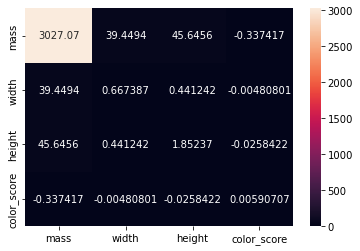

In [35]:
sn.heatmap(covMx, annot=True, fmt='g')
plt.show()

# تمرین 3

In [62]:
# تمرین 3
arr = []
for i in dataset.var(0):
    arr.append(i)
dataset.var(0)


mass           3027.071888
width             0.667387
height            1.852367
color_score       0.005907
dtype: float64

### خروجی واریانس برای دیتاست ماست که درواقع واریانس را برای هر فیچر یا ستون محاسبه میکند

In [58]:
max(dataset.var(0))

3027.0718877849226

In [59]:
min(dataset.var(0))

0.005907071887784927

### به سادگی بیشترین مقدار واریانس و کمترین آن را بدست آوردیم ، اما سوال ازما نام فیچر را هم میخواهد ، پس به محاسبه ادامه میدهیم

In [129]:
varArray = np.array(dataset.var(0))
headset = ["mass" , "width", "height" , "color_score"]
df3 = pd.DataFrame(varset)
dictvar = {}
for i in range(0,4):
    dictvar[headset[i]] = varArray[i]
print(dictvar)




{'mass': 3027.0718877849226, 'width': 0.667387492694331, 'height': 1.852367036820572, 'color_score': 0.005907071887784927}


### در این مرحله پس از محاسبه واریانس ها به کمک کتابخانه نامپای ، در ادامه با استفاده از دیکشنری و یک حلقه  مقادیر واریانس ها را به فیچر ها نسبت میدهیم و در دیکشنری مد نظر ذخیره میکنیم

In [131]:
print("the most value for cov is in : "+ list(dictvar.keys())[list(dictvar.values()).index(max(dictvar.values()))] )
print(max(dictvar.values()))

the most value for cov is in : mass
3027.0718877849226


In [130]:
print("the min value for cov is in : "+ list(dictvar.keys())[list(dictvar.values()).index(min(dictvar.values()))] )
print(min(dictvar.values()))

the min value for cov is in : color_score
0.005907071887784927


### حالا در انتها توانستیم مقادیر واریانس و نام فیچر را به کمک دیکشنری ایجاد شده و توابع آماده برای پیدا کردن ماکس و مین ، پیدا کنیم و برگردانیم

# تمرین 4

In [4]:
# تمرین شماره 4
covMx = pd.DataFrame.cov(df)
covMx.head()

covArr = np.array(covMx)
print(covArr)



[[ 3.02707189e+03  3.94493863e+01  4.56456458e+01 -3.37416715e-01]
 [ 3.94493863e+01  6.67387493e-01  4.41241964e-01 -4.80800701e-03]
 [ 4.56456458e+01  4.41241964e-01  1.85236704e+00 -2.58421975e-02]
 [-3.37416715e-01 -4.80800701e-03 -2.58421975e-02  5.90707189e-03]]


### با استفاده از پانداس ماتریس کوواریانس را برای دیتاست تشکیل میدهیم

In [58]:
headset = ["mass" , "width", "height" , "color_score"]

maxValue = np.amax(covArr)
print("first max was for mass/mass , so we go for second max:")

flat=covArr.flatten()
flat.sort()
flat[-2]


first max was for mass/mass , so we go for second max:


45.64564582115722

#### بزرگترین مقدار برای کوواریانس را میخواهیم با شرط اینکه هر دو فیچر اعمال شده در فرمول ریاضی کوواریانس یکسان نباشند
بیشترین مقدار ، مربوط به دو فیچر یکسان است پس از آن عبور کردیم و تصمیم گرفتیم با مرتب کردن آرایه خطی ای که از ماتریس به دست آوردیم، دومین بیشترین مقدار را انتخاب میکنیم و در ادامه بررسی میکنیم که ببینیم آیا دو فیچر یکسان این مقدار را خروجی داده است یا خیر

In [16]:
minValue = np.amin(covArr)
print(minValue)

-0.3374167153711281


### کوچکترین مقدار کواریانس را برمیگردانیم 

In [49]:
covMx = pd.DataFrame.cov(df)
covMx.head()

,mass,width,height,color_score
mass,3027.071888,39.449386,45.645646,-0.337417
width,39.449386,0.667387,0.441242,-0.004808
height,45.645646,0.441242,1.852367,-0.025842
color_score,-0.337417,-0.004808,-0.025842,0.005907


### خب در جدول بالا که در واقع ماتریس کوواریانس ماست میبینیم که مقدار ماکس و مینیممی که بدست آورده ایم صحیح بوده و متعلق به دو فیچر یکسان نیست

In [9]:
headset = ["mass" , "width", "height" , "color_score"]
arrdata = np.array(dataset)

### به وسیله قطعه کد بالا و کد زیر ، ماتریس دو در دو برای هر دو فیچر محاسبه میشود و پرینت میشود
قطعه کد زیر به این صورت است که فانکشنی که کوواریانس محاسبه میکند و کتابخانه نامپای آن را توسعه داده است دو ورودی میگرد که هر کدام یکی از فیچر های ماست

In [60]:
for i in range(0,4):
    for j in range(0,4):
        x = np.cov(df[headset[i]],df[headset[j]])
        y = headset[i]
        z = headset[j]
        print(y)
        print(x)
        print(z)
        print('----')
        

mass
[[3027.07188778 3027.07188778]
 [3027.07188778 3027.07188778]]
mass
----
mass
[[3.02707189e+03 3.94493863e+01]
 [3.94493863e+01 6.67387493e-01]]
width
----
mass
[[3.02707189e+03 4.56456458e+01]
 [4.56456458e+01 1.85236704e+00]]
height
----
mass
[[ 3.02707189e+03 -3.37416715e-01]
 [-3.37416715e-01  5.90707189e-03]]
color_score
----
width
[[6.67387493e-01 3.94493863e+01]
 [3.94493863e+01 3.02707189e+03]]
mass
----
width
[[0.66738749 0.66738749]
 [0.66738749 0.66738749]]
width
----
width
[[0.66738749 0.44124196]
 [0.44124196 1.85236704]]
height
----
width
[[ 0.66738749 -0.00480801]
 [-0.00480801  0.00590707]]
color_score
----
height
[[1.85236704e+00 4.56456458e+01]
 [4.56456458e+01 3.02707189e+03]]
mass
----
height
[[1.85236704 0.44124196]
 [0.44124196 0.66738749]]
width
----
height
[[1.85236704 1.85236704]
 [1.85236704 1.85236704]]
height
----
height
[[ 1.85236704 -0.0258422 ]
 [-0.0258422   0.00590707]]
color_score
----
color_score
[[ 5.90707189e-03 -3.37416715e-01]
 [-3.37416715e-

# شماره 5

In [76]:
# شماره 5 
#centering
avg_arr = np.array(avg_clmns)
#print(avg_arr)
dfw = df 
for i in range(0,4):
    dfw[i] = dfw[headset[i]] - avg_arr[i]
centered = dfw.iloc[:, 4:8]
centered.rename(columns={0: 'mass', 1: 'width', 2 : 'height' , 3 : 'color_score'}, inplace=True)
centered.head()
#now centered is a matrix that is centered


,mass,width,height,color_score
0,28.881356,1.294915,-0.39322,-0.212881
1,16.881356,0.894915,-0.89322,-0.172881
2,12.881356,0.294915,-0.49322,-0.162881
3,-77.118644,-0.905085,-2.99322,0.037119
4,-79.118644,-1.105085,-3.09322,0.027119


### در این مرحله به کم کردن میانگین هر ستون از هر مقدار در آن ستون پرداختیم و بخشی از دیتاست را مانند یک جدول برگرداندیم ، توجه کنید که این جدول برگردانده شده تنها برای نمایش است و همه دیتاست را نشان نداده است ، اما در محاسبات همه دیتا ها و مقادیر لحاظ شده است

In [ ]:
#cosine calculating
List1 = centered.iloc[: , 0:1]
List2 = centered.iloc[: , 1:2]
List3 = centered.iloc[: , 2:3]
List4 = centered.iloc[: , 3:4]
lists = [List1,List2,List3,List4]
cosarr = []
cosres = []
for i in range(0,4):
    for j in range(0,4):    
        result = 1 - spatial.distance.cosine(lists[i], lists[j])
        if i == j :
            continue
        print(headset[i] )
        print(result)
        print(headset[j])
        print("----")
        add = str(str(result)+ " : " + headset[i]+" / "  + headset[j])
        cosarr.append(add)
        cosres.append(result)
#returning the max        
print("-----------------------")
print("max and features :")        
maxrng = max(cosres)
for i in cosarr:
    if str(maxrng) in i :
        maxrange = i
print(maxrange)

### در این مرحله مجبوریم یک آرایه ایجاد کنیم که هر خانه از این آرایه مقادیر یک ستون از دیتاست ما را در خود جای داده است
سپس با دو حلقه تو در تو ، تمام حالات را دو به دو به ورودی فانکشن مد نظر میدهیم و مقادیر به دست آمده را در کنار  نام فیچر ها چاپ میکنیم
در هر مرحله و در هر پیمایش یک جوین انجام میدهیم و نام هر دو فیچر که ورودی فانکشن محاسبه همبستگی کسینوسی بوده اند را  در کنار مقدار محاسبه شده برای همبستگی این دو فیچر ، در کنار هم قرار داده و به شکل استرینگ در یک آرایه پوش میکنیم ، این کار را در تمامی پیمایش ها انجام میدهیم

حال برای بدست آورد ماکس و نام فیچر های به وجود آورنده آن از این آرایه استفاده میکنیم
به این صورت که ابتدا مقدار ماکس را با استفاده از فانکشن آماده ماکس بدست میاوریم و سپس با استفاده از یک حلقه بررسی میکنیم که کدام عبارت ذخیره شده این عدد ماکس را شامل میشود و همان را برمیگردانیم


In [152]:
#correlation
cormat = centered.corr()
round(cormat,2)

,mass,width,height,color_score
mass,1.00,0.88,0.61,-0.08
width,0.88,1.00,0.40,-0.08
height,0.61,0.40,1.00,-0.25
color_score,-0.08,-0.08,-0.25,1.00


### برای تست خروجی ها ماتریس کوریلیشن را بدست آوردیم که البته نیاز هم نبود

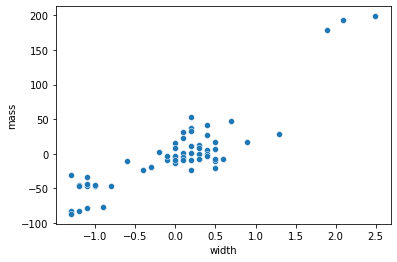

In [158]:
#Scatter Plot WIDTH-MASS
sn.scatterplot(x="width", y="mass", data=centered);

### ترسیم اسکاتر ، با پاس دادن دیتاست سنتر شده و نام های فیچر ها به تابع اسکاتر پلات خروجی را رسم کردیم  

# تمرین 6

C:\Users\ALI\AppData\Local\Temp/ipykernel_6648/1280477372.py:16: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "y1" (-> marker='1'). The keyword argument will take precedence.
  plt.plot('x1', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1)
C:\Users\ALI\AppData\Local\Temp/ipykernel_6648/1280477372.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y1" (-> color='y'). The keyword argument will take precedence.
  plt.plot('x1', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1)


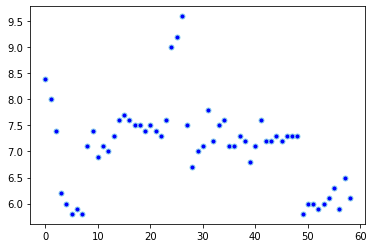

In [3]:
#تمرین شماره 6 

import math  
import matplotlib.pyplot as plt
import numpy
import pandas as pd


def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(math.pi * 2)
    return math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma)


df = pd.DataFrame({'x1': dataset['width']})

plt.plot('x1', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=1)
plt.show()

In [4]:
sorted_width = np.array(dataset['width'])
sorted_width.sort()
mx = max(sorted_width)
mn = min(sorted_width)
print('max :'+ str(mx)+ ' AND '+'min :' +str(mn))

max :9.6 AND min :5.8


### ستون یا فیچر مد نظر را از دیتا ست بیرون میکشیم و آن را به آرایه تبدیل میکنیم
سپس این آرایه را مرتب میکنیم و مقدار ماکس و مین را بدست میاوریم

این دو مقدار را در آینده نیاز داریم

هدف تشکیل رنج مقادیر برای فیچر انتخاب شده است

از کتابخانه های سای پای ، مت پلات لیب و استاتیستیکس استفاده میکنیم

پلات که برای نمایش و تشکیل نمودار است 

استاتیستیکس برای محاسبه میانگین و استاندارد دیویژن استفاده میشود که ورودی این دو فانکشن یا رنج یا بازه تغییرات فیچر انتخاب شده است 

یا خود فیچر را انتخاب میکنیم و به همراه تمام اعضا به فانکشن محاسبه میانگین و استاندارد دیویژن پاس میدهیم


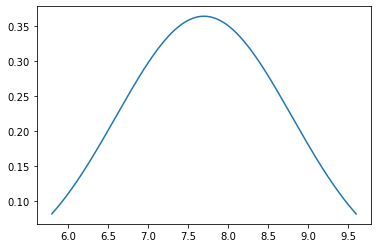

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  
# Plot between max and min of with coloumn with 0.001 steps.
x_axis = np.arange(mn,mx, 0.001)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

### در طرح اول و محاسبات برای رسیدن به این نمودار ، از رنج یا بازه تغییرات مقادیر فیچر انتخاب شده استفاده کردیم، به این صورت که با استفاده از کتابخانه نامپای رنج تغییرات مقادیر این فیچر را با گام هایی به بزرگی 0.001 از مین به ماکس طی کردیم و خروجی یک آرایه است که آن را به ورودی فانکشن های محاسبات استاندارد دیویژن و میانگین پاس داده ایم

پس از این با استفاده از پلات ترسیم را انجام داده ایم

نکته بعدی استفاده از کتابخانه سای پای برای محاسبه تابع چگالی است که آن را برای ترسیم به پلات پاس میدهیم یا درون آن محاسبه میکنیم

norm.pdf با استفاده از کتابخانه سای پای
تابع چگالی بدست می آید

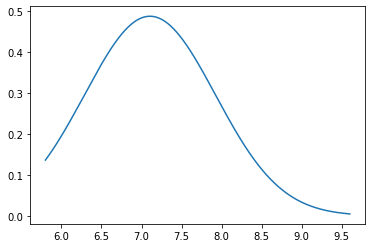

In [133]:
# Calculating mean and standard deviation
# we are going deep down in width col in dataset
mean = statistics.mean(dataset['width'])
sd = statistics.stdev(dataset['width'])
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

### در این حالت ، که خروجی آن را در تصویر بالا میبینید ، به جای استفاده از رنج تغییرات برای مقادیر فیچر مد نظر ، از خود مقادیر فیچر استفاده کردیم و باقی مراحل ثابت است

# شماره 7 

In [138]:
#  شماره 7
# روش پیشنهادی من استفاده از میانگین یا میانه است و میتوان به این صورت دیتای از دست رفته را جایگزین کرد
data = dataset
data["width"] = data["width"].replace(np.NaN, data["width"].median())
#print(data["width"][:59])


### در راه حل پیشنهادی بالا ، مقدار نال یا خالی یا گم شده را با یک مقدار دیگر جایگزین کرده ایم

حال مقدار جدید را با استفاده از میانگین گرفتن از مقادیر این فیچر یا ستون خاص، محاسبه میکنیم یا میتوان از شاخصه های آماری دیگری مثل میانه برای همین فیچر یا ستون هم استفاده کرد

In [ ]:
# روش بعدی استفاده از ماشین لرنینگ است
from sklearn.linear_model import LinearRegression

test_data = data[data["width"].isnull()]
data.dropna(inplace=True)

y_train = data["width"]
X_train = data.drop("width", axis=1)
X_test = test_data.drop("width", axis=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Here 'width' column contains missing values so for prediction of null values the spliting of data will be,

y_train: rows from data["width"] with non null values

y_test: rows from data["width"] with null values

X_train: Dataset except data["width"] features with non null values

X_test: Dataset except data["width"] features with null values

### از ماشین لرنینگ استفاده میکنیم و فرآیند های تمرین و تست را طی میکنیم همانطور که در چند خط بالایی توضیح داده شده است

از رگرسیون خطی استفاده شده است و در نهایت یک مدل جدید پیش بینی میشود

علی عسگری 40032223